In [1]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [5]:
tx_user = pd.read_csv('tx_user.csv', encoding='ISO-8859-1')
tx_user.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,1
2,12748.0,0
3,12749.0,3
4,12820.0,2


In [7]:
tx_user.shape

(3950, 2)

In [9]:
tx_user.Recency.describe()

count    3950.000000
mean       90.778481
std       100.230349
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

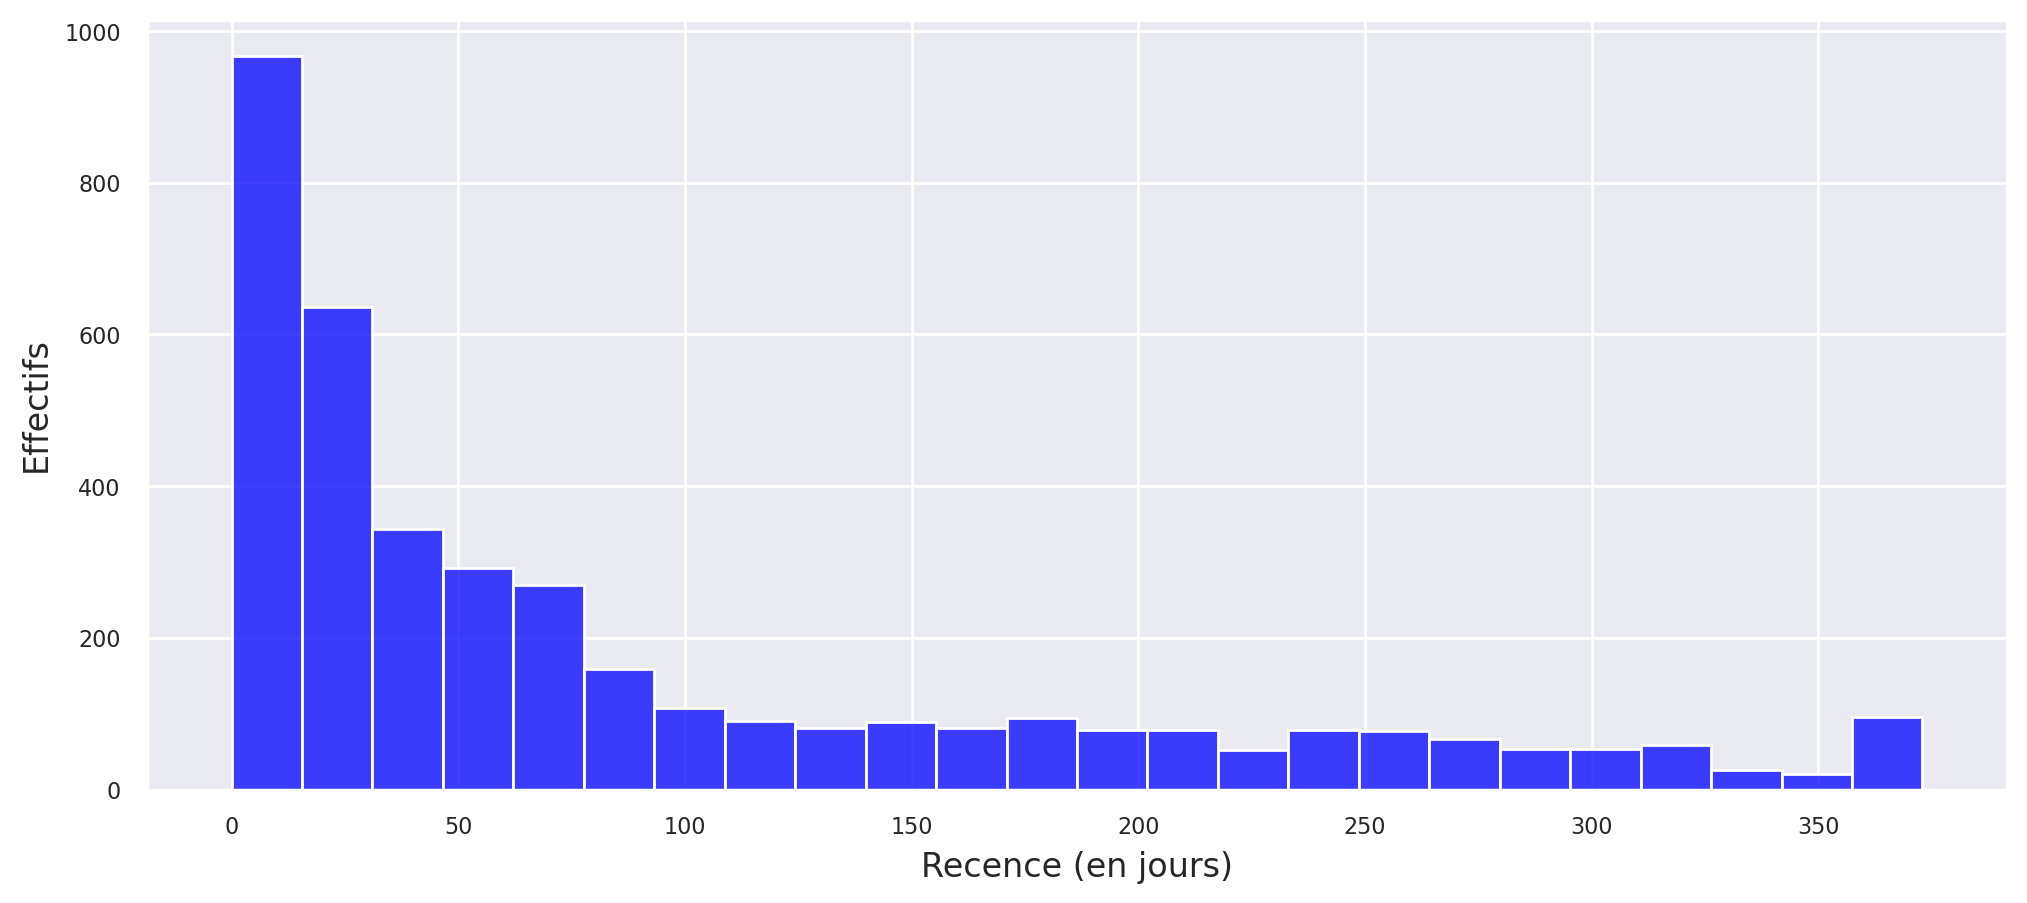

In [19]:
plt.figure(figsize=(12, 5))
graph = sns.histplot(x='Recency', data=tx_user, color='blue')
graph.set(xlabel='Recence (en jours)', ylabel='Effectifs')
plt.tick_params(axis='both', which='major', labelsize=8)

In [23]:
tx_user['Recency']

0       325
1         1
2         0
3         3
4         2
       ... 
3945    277
3946    180
3947      7
3948      3
3949     42
Name: Recency, Length: 3950, dtype: int64

In [25]:
tx_user[['Recency']]

,Recency
0,325
1,1
2,0
3,3
4,2
...,...
3945,277
3946,180
3947,7
3948,3


In [29]:
tx_user.Recency

0       325
1         1
2         0
3         3
4         2
       ... 
3945    277
3946    180
3947      7
3948      3
3949     42
Name: Recency, Length: 3950, dtype: int64

In [31]:
from sklearn.cluster import KMeans

sse={}

tx_recency = tx_user[['Recency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

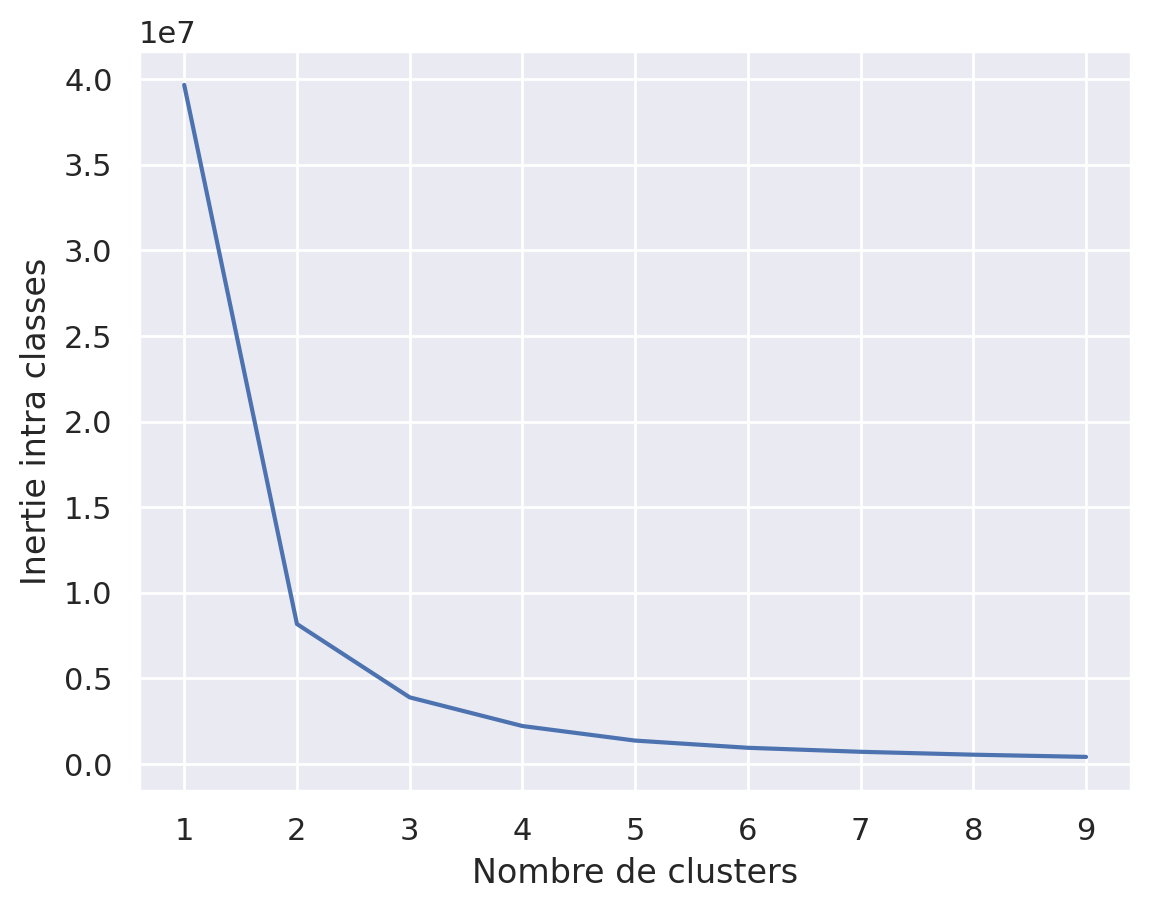

In [33]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie intra classes")
plt.show()

In [35]:
tx_recency

,Recency,clusters
0,325,1
1,1,5
2,0,5
3,3,5
4,2,5
...,...,...
3945,277,4
3946,180,2
3947,7,5
3948,3,5


In [37]:
sse

{1: 39672139.17088604,
 2: 8179631.146517279,
 3: 3896201.183171251,
 4: 2220756.8708803677,
 5: 1370347.3037913889,
 6: 949662.8306496621,
 7: 716086.0918197228,
 8: 546197.8361901665,
 9: 417438.3796208172}

In [39]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])

KMeans(n_clusters=4)

In [43]:
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])
tx_user

,CustomerID,Recency,RecencyCluster
0,12346.0,325,1
1,12747.0,1,0
2,12748.0,0,0
3,12749.0,3,0
4,12820.0,2,0
...,...,...,...
3945,18280.0,277,1
3946,18281.0,180,3
3947,18282.0,7,0
3948,18283.0,3,0


In [49]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis=1)
    df_final = df_final.rename(columns={"index": cluster_field_name})
    return df_final


In [51]:
tx_user = order_cluster('RecencyCluster', 'Recency', tx_user, False)

In [53]:
tx_user

,CustomerID,Recency,RecencyCluster
0,12346.0,325,0
1,12829.0,321,0
2,12831.0,261,0
3,12834.0,282,0
4,12845.0,266,0
...,...,...,...
3945,18252.0,50,2
3946,18255.0,88,2
3947,18265.0,71,2
3948,18277.0,57,2


In [57]:
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,478.0,304.393305,41.183489,245.0,266.25,300.0,336.00,373.0
1,568.0,184.625000,31.753602,132.0,156.75,184.0,211.25,244.0
2,954.0,77.679245,22.850898,48.0,59.00,72.5,93.00,131.0
3,1950.0,17.488205,13.237058,0.0,6.00,16.0,28.00,47.0


In [59]:
tx_user['Cluster'] = 'Inactivité élevée'
tx_user.loc[tx_user['RecencyCluster']>0,'Cluster'] = 'Inacativité moyenne' 
tx_user.loc[tx_user['RecencyCluster']>1,'Cluster'] = 'Inactivité faible' 

In [61]:
tx_user

,CustomerID,Recency,RecencyCluster,Cluster
0,12346.0,325,0,Inactivité élevée
1,12829.0,321,0,Inactivité élevée
2,12831.0,261,0,Inactivité élevée
3,12834.0,282,0,Inactivité élevée
4,12845.0,266,0,Inactivité élevée
...,...,...,...,...
3945,18252.0,50,2,Inactivité faible
3946,18255.0,88,2,Inactivité faible
3947,18265.0,71,2,Inactivité faible
3948,18277.0,57,2,Inactivité faible


<Figure size 1200x500 with 0 Axes>

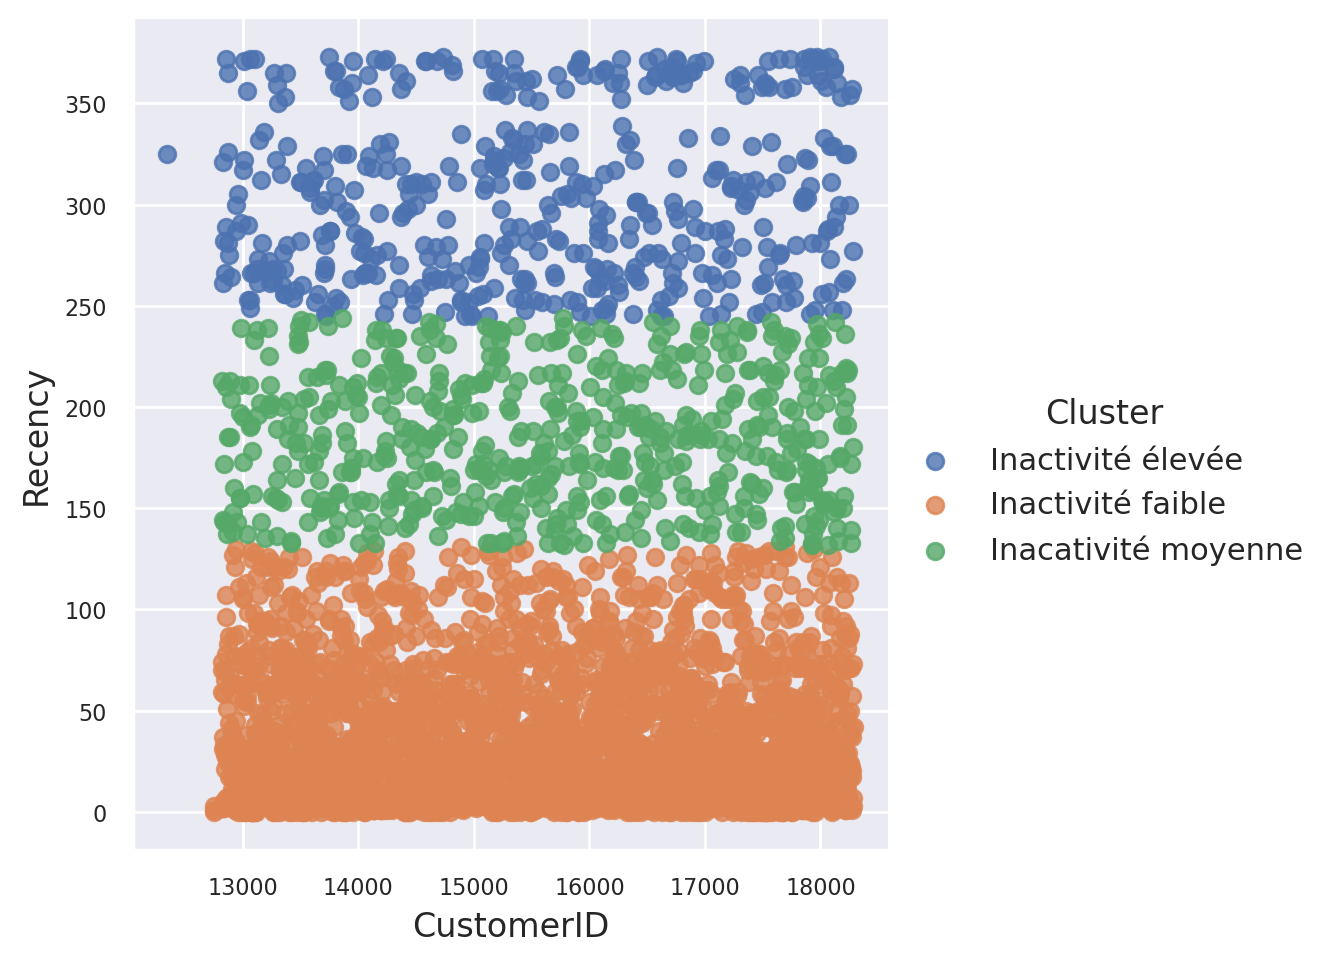

In [63]:
plt.figure(figsize=(12, 5))
graph = sns.lmplot(data=tx_user, x='CustomerID', y='Recency', hue='Cluster', fit_reg=False)
plt.tick_params(axis='both', which='major', labelsize=8)